## Visualizing F0 and Loudness

For simplicity, looking at only MIDI pitch 60

In [20]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Audio
from ddsp.core import midi_to_unit
from tfrecord_provider import CompleteTFRecordProvider

plt.style.use('dark_background')

In [21]:
sample_rate = 16000
tfrecord_path = os.path.join('d:/soundofai/prepare_pitch_60_data/pitch_60_dataset', 'train', 'complete.tfrecord')
dataset = iter(CompleteTFRecordProvider(tfrecord_path).get_batch(batch_size=1))

File: guitar_electronic_035-060-100


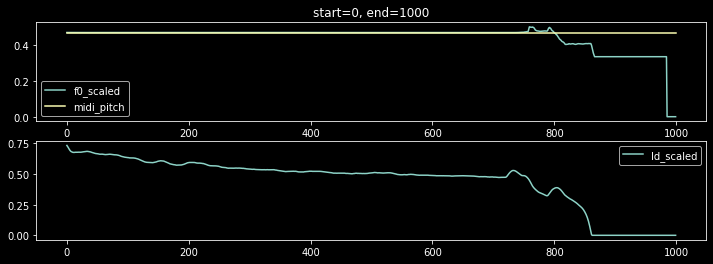

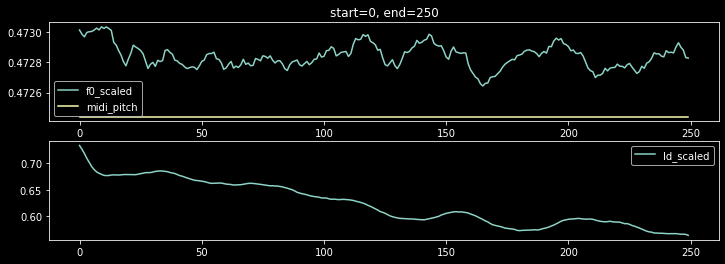

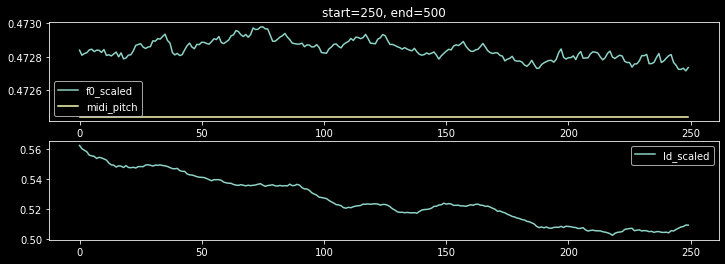

In [33]:
def plot_f0():
    def _plot_f0(features, start_index=0, end_index=1000):
        title = f'start={start_index}, end={end_index}'
        plt.figure(figsize=(12, 4))

        midi_pitch = midi_to_unit(
            np.squeeze(features['note_number']),
            midi_min=np.array([0]), midi_max=np.array([127])
        )

        f0_scaled = np.squeeze(features['f0_scaled'])[start_index:end_index]
        ld_scaled = np.squeeze(features['ld_scaled'])[start_index:end_index]
        midi_pitch = midi_pitch * np.ones((end_index - start_index,))

        plt.subplot(2, 1, 1)
        plt.plot(f0_scaled, label='f0_scaled')
        plt.plot(midi_pitch, label='midi_pitch')
        plt.title(title)
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(ld_scaled, label='ld_scaled')
        plt.legend()

        plt.show()

    features = next(dataset)
    sample_name = np.squeeze(features["sample_name"]).astype('str')
    print(f'File: {sample_name}')
    for start, end in zip([0, 0, 250], [1000, 250, 500]):
        _plot_f0(features, start, end)

    return np.squeeze(features['audio'])

audio = plot_f0()
Audio(audio, rate=sample_rate)